In [31]:
import numpy as np
from scipy import special as sp
from common.baseclasses import ArrayWithAxes as AWA
import matplotlib.pyplot as plt

In [32]:
class Generator:
    """
        Generator of Bessel functions placed at arbitrary "center" position
        within an xy mesh space.  Works by generating a bessel function on
        a much larger xy mesh and then translating/truncating to the
        original mesh.  Nothing fancy, but good for performance.
    """

    def __init__(self,q=20, \
                 xs=np.linspace(-1,1,101), \
                 ys=np.linspace(-1,1,101),
                 f = lambda r: sp.jv(0,r)):

        self.f = f

        #Bookkeeping of the coordinate mesh
        self.xs,self.ys=xs,ys
        self.shape=(len(xs),len(ys))
        self.midx=self.xs[self.shape[0]//2]
        self.midy=self.ys[self.shape[1]//2]
        self.dx=np.max(self.xs)-np.min(self.xs)
        self.dy=np.max(self.ys)-np.min(self.ys)

        #Make a mesh grid twice bigger in each direction
        bigshape=[2*N-1 for N in self.shape]
        xs2grid,ys2grid=np.ogrid[-self.dx:+self.dx:bigshape[0]*1j,
                                 -self.dy:+self.dy:bigshape[1]*1j]
        self.xs2=xs2grid.squeeze()
        self.ys2=ys2grid.squeeze()

        rs2 = np.sqrt(xs2grid**2+ys2grid**2)

        self.bigJ = self.f(rs2)

    def __call__(self,x0,y0):
        shift_by_dx=x0-self.midx
        shift_by_dy=y0-self.midy
        shift_by_nx=int(self.shape[0]*shift_by_dx/self.dx)
        shift_by_ny=int(self.shape[1]*shift_by_dy/self.dy)
        newJ=np.roll(np.roll(self.bigJ,shift_by_nx,axis=0),\
                     shift_by_ny,axis=1)
        output = newJ[self.shape[0]//2:(3*self.shape[0])//2,\
                     self.shape[1]//2:(3*self.shape[1])//2]
        return AWA(output,axes=[self.xs,self.ys])


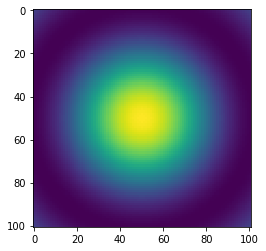

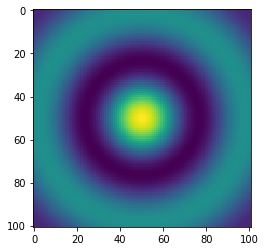

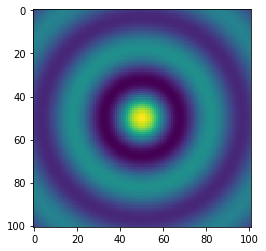

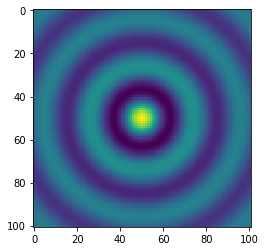

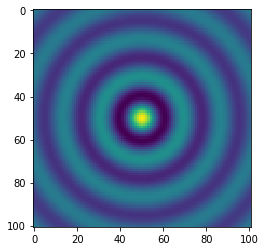

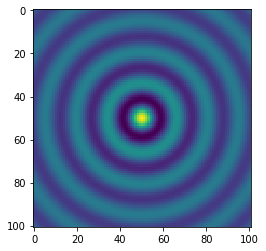

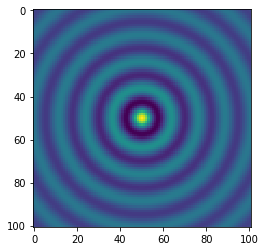

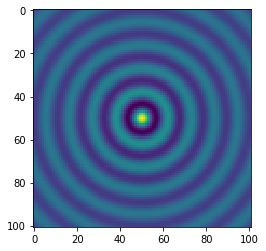

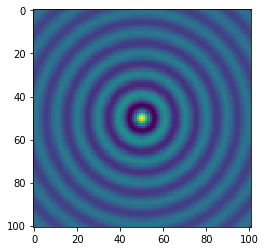

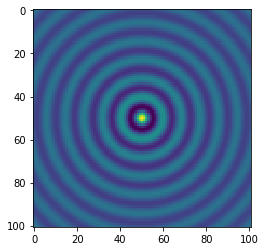

In [36]:
def mybessel(v,A,Q,r):
    return A*sp.jv(v,Q*r)

N=10
q=20

for n in range(0,N):
    q_prefactor = (2*q*(n+1)/(N+1))**2
    exp_prefactor = np.exp(-2*(n+1)/(N+1))
    A = q_prefactor*exp_prefactor
    Q = (2*q*(n+1)/(N+1))
    
    gen = Generator(xs=np.linspace(-1,1,101), ys=np.linspace(-1,1,101), f=lambda r: mybessel(0,A,Q,r))
    plt.figure()
    plt.imshow(gen(0,0))
    plt.show()